In [7]:
! pip install face_recognition

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)


In [8]:
! pip install opencv-python

In [9]:
import numpy as np

In [10]:
import cv2 

In [25]:
import face_recognition as fr

In [26]:
# ! pip install matplotlib

In [27]:
import matplotlib.pyplot as plt

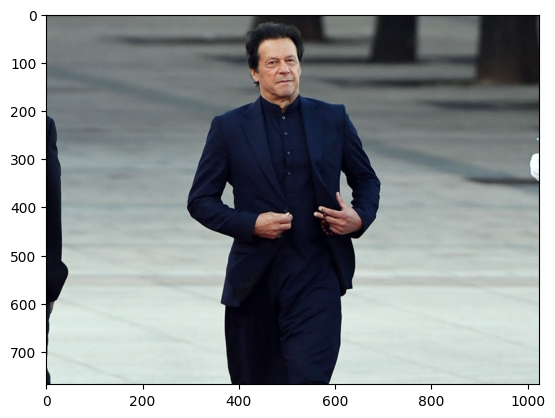

In [84]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(r"D:\web-scrab\imrankhan.jpg")
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.axis('on') 
plt.show()

In [82]:

def measure_face(image):
    image = cv2.imread(image)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    f_landmarks_list = fr.face_landmarks(rgb_image)
    if not f_landmarks_list:
        print("No face detected.")
        return
    face_landmarks = f_landmarks_list[0]
    left_eye = np.array(face_landmarks['left_eye'])
    right_eye = np.array(face_landmarks['right_eye'])
    nose_bridge = np.array(face_landmarks['nose_bridge'])
    chin = np.array(face_landmarks['chin'])
    left_ear = np.array([chin[0], chin[1], chin[2]])  
    right_ear = np.array([chin[-1], chin[-2], chin[-3]])  
    eye_width = np.linalg.norm(left_eye[0] - left_eye[3])
    nose_length = np.linalg.norm(nose_bridge[0] - nose_bridge[-1])
    jaw_width = np.linalg.norm(chin[0] - chin[-1])
    left_ear_width = np.linalg.norm(left_ear[0] - left_ear[-1])
    right_ear_width = np.linalg.norm(right_ear[0] - right_ear[-1])
    trustworthiness = "Trustworthy" if abs(left_ear_width - right_ear_width) < 5 and eye_width > nose_length * 0.5 else "Untrustworthy"
    for feature in face_landmarks.keys():
        points = np.array(face_landmarks[feature])
        for point in points:
            cv2.circle(rgb_image, tuple(point), 7, (0, 255, 0), -1)  
    plt.figure(figsize=(8, 6))  
    plt.imshow(rgb_image)
    plt.title("Detected Face with Landmarks")
    plt.axis("on")
    plt.show()
    print(f"Person is: {trustworthiness}")
    print(f"Nose Length: {nose_length:.2f} pixels")
    print(f"Jaw Width: {jaw_width:.2f} pixels")
    print(f"Eye Width: {eye_width:.2f} pixels")
    print(f"Right Ear Width: {right_ear_width:.2f} pixels")
    print(f"Left Ear Width: {left_ear_width:.2f} pixels")

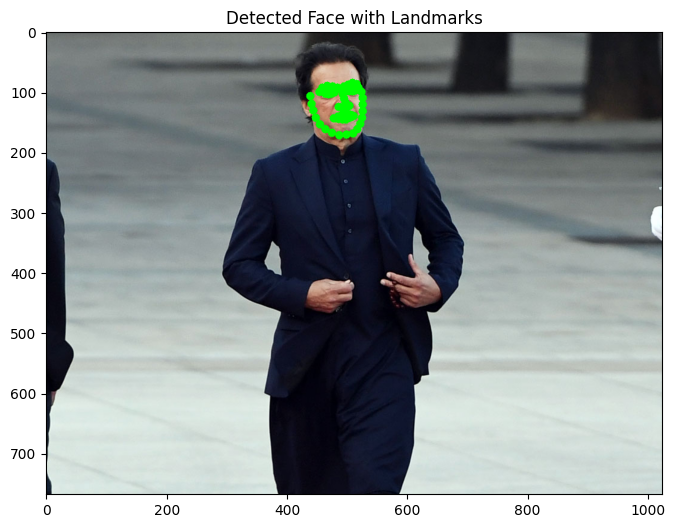

Person is: Trustworthy
Nose Length: 19.92 pixels
Jaw Width: 85.29 pixels
Eye Width: 15.13 pixels
Right Ear Width: 21.10 pixels
Left Ear Width: 24.52 pixels


In [83]:
image = r"D:\web-scrab\imrankhan.jpg"
measure_face(image)

--what is dpi ? DPI is a print/scan resolution metric, not always meaningful for photos.
In digital images, the term is usually PPI (pixels per inch) — both describe scale.

In most of the case the dpi of image is not given like camara picture and screenshort etc. so defoult set the dpi 72 or 96 DPI

In [49]:
from PIL import Image
image = Image.open(r"D:\web-scrab\imrankhan.jpg")
dpi = image.info.get('dpi', 'Not specified')
print("DPI:", dpi)


DPI: Not specified


In [89]:
jaw_width = 85.29 
dpi = 96  
jaw_width_inches = jaw_width / dpi
print ("Jaw Width in inches ")
print(jaw_width_inches)


Jaw Width in inches 
0.8884375000000001


dip 96

In [88]:
nose_length: 19.92 
dip = 96
nose_length_inches = nose_length / dip
print ("Nose in inches ")
print (nose_length_inches )

Nose in inches 
0.20755061297053412


dip 72

In [90]:
jaw_width = 85.29 
dpi = 72 
jaw_width_inches = jaw_width / dpi
print ("Jaw Width in inches ")
print(jaw_width_inches)

Jaw Width in inches 
1.1845833333333333
